In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('../data/TRAIN_TEST_corrected3/train_corrected3.csv')
dfTest = pd.read_csv('../data/TRAIN_TEST_corrected3/test_corrected3.csv')

train = dfTrain.drop(['id', 'price_usd', 'day_created', 'year_created', 'month_created'], axis=1)
target = dfTrain.price_usd

test = dfTest.drop(['id', 'day_created', 'year_created', 'month_created'], axis=1)
test_ids = dfTest.id

In [3]:
train.head()

,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store,entorno_score
0,16861.066565,-34.600116,-58.565334,62.0,3.0,0.0,1.0,0.0,0.0,1.000000
1,5360.128545,-34.597274,-58.439479,44.0,2.0,0.0,1.0,0.0,0.0,574.406311
2,52335.901227,-34.602089,-58.952129,150.0,2.0,0.0,0.0,1.0,0.0,1.000000
3,6330.619537,-34.567401,-58.434775,250.0,4.0,0.0,1.0,0.0,0.0,242.498491
4,7561.524039,-34.626409,-58.459324,40.0,1.0,0.0,1.0,0.0,0.0,742.460857


In [4]:
test.head()

,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store,entorno_score
0,1.845233e+03,-34.610988,-58.363464,0.0,3.0,0.0,1.0,0.0,0.0,107.626361
1,1.093342e+07,38.115688,13.361267,0.0,2.0,0.0,1.0,0.0,0.0,1.000000
2,3.285172e+03,-34.589363,-58.412880,53.0,3.0,0.0,1.0,0.0,0.0,602.414005
3,5.666115e+06,9.986682,-84.770722,39.0,3.0,0.0,1.0,0.0,0.0,1.000000
4,5.666115e+06,9.986682,-84.770722,51.0,3.0,0.0,1.0,0.0,0.0,1.000000


In [6]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state':13}

GBR = GradientBoostingRegressor(**params)

In [7]:
GBR.fit(train, target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=13,
             subsample=1.0, verbose=0, warm_start=False)

In [8]:
predictions = GBR.predict(test)

In [9]:
result = pd.DataFrame({'id':test_ids, 'price_usd':predictions})

In [10]:
result.head()

,id,price_usd
0,3632,186765.573858
1,3633,205939.115563
2,2263404,164801.155712
3,2263405,157920.391202
4,2263406,165193.534058


In [34]:
feature_importance = GBR.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
result = pd.DataFrame({'features':train.columns, 
                       'importance':feature_importance}).sort_values(by='importance', ascending=False)

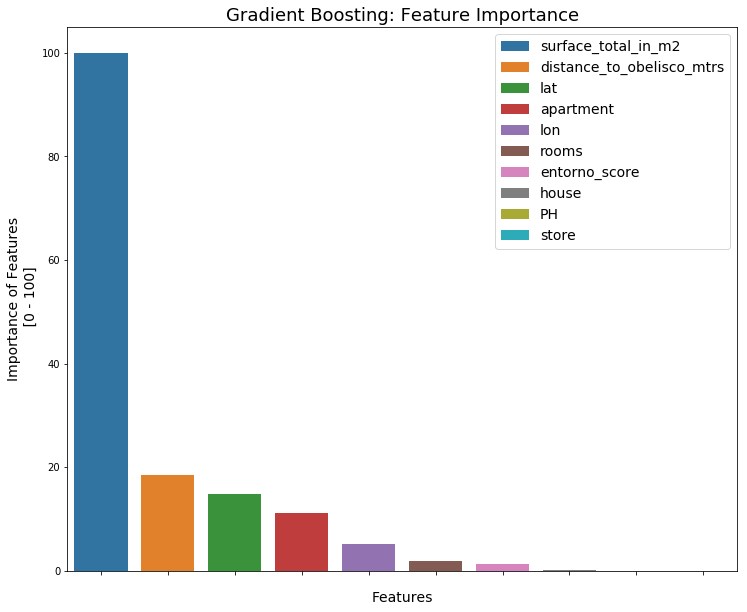

In [86]:
ax = sns.barplot(data=result, x='features', y='importance', hue='features');
ax.set_title("Gradient Boosting: Feature Importance", fontsize=18)
ax.legend(fontsize=14)
leg = ax.get_legend()

ax = sns.barplot(data=result, x='features', y='importance');
ax.legend = leg
ax.tick_params(axis='x', which='both', labelbottom='off')
ax.get_figure().set_figwidth(12)
ax.get_figure().set_figheight(10)
ax.set_title("Gradient Boosting: Feature Importance", fontsize=18)
ax.set_xlabel("\nFeatures", fontsize=14);
ax.set_ylabel("Importance of Features\n [0 - 100]", fontsize=14);